In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
path="DATA_SPLIT_JPG_CSV/photos/tuberculosis-phone-1261.jpg"
df=pd.read_csv("DATA_SPLIT_JPG_CSV/anotations/tuberculosis-phone-1261.csv")

img=cv2.imread(path)


# Equalization
img[:,:,1] = cv2.equalizeHist(img[:,:,1])
img[:,:,0] = cv2.equalizeHist(img[:,:,0])
img[:,:,2] = cv2.equalizeHist(img[:,:,2])
##############


# Border Detection
img_grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gauss = cv2.GaussianBlur(img_grey, (3,3), 0)
cv2.imshow("suavizado", gauss)

#ret, thresh1 = cv2.threshold(gauss, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 

# Detectamos los bordes con Canny
canny = cv2.Canny(gauss, 40, 220) 
cv2.imshow("canny", canny)
# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
###############
cv2.drawContours(img,contornos,-1,(0,0,255), 2)

   
## Delete Background 
#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#lower_bound = np.array([10, 0, 0])   
#upper_bound = np.array([170, 250, 255])
#mask = cv2.inRange(hsv, lower_bound, upper_bound)

#define kernel size   
#kernel = np.ones((3,3),np.uint8)
        # Remove unnecessary noise from mask
#mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
#mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

        # Segment only the detected region
#segmented_img = cv2.bitwise_and(img, img, mask=mask)

        # Find contours from the mask
#contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#img = cv2.drawContours(segmented_img, contours, -1, (0, 0, 255), 2)
 
#cv2.drawContours(img,contornos,-1,(255,0,0), 2)

for coordinate in df.iterrows():
    cv2.rectangle(img, (int(coordinate[1][0].split(" ")[0]), int(coordinate[1][0].split(" ")[1])), (int(coordinate[1][0].split(" ")[2]), int(coordinate[1][0].split(" ")[3])), (0, 255, 0), 3, cv2.LINE_AA)
    
 
cv2.imshow("contornos", img)

cv2.waitKey(0)

cv2.waitKey()
 
#plt.imshow(img)
#plt.show()

32

: 

In [61]:
ret

128.0

Otsu thresholding

In [58]:
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5,5), 0)

ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)     
  
# the window showing output image         
# with the corresponding thresholding         
# techniques applied to the input image    
cv2.imshow('Otsu Threshold', thresh1) 

cv2.waitKey() 

32

Apply connected component labeling to an image

In [36]:
img=cv2.imread("DATA_SPLIT_JPG_CSV/photos/tuberculosis-phone-0009.jpg")

# Getting the input image
img = cv2.imread(path, 0)

img = cv2.GaussianBlur(img, (5,5), 0)
# Converting those pixels with values 1-127 to 0 and others to 1
img = cv2.threshold(img,134,255, cv2.THRESH_BINARY)[1]

# Applying cv2.connectedComponents() 
num_labels, labels = cv2.connectedComponents(img)
    

In [35]:
for coordinate in df.iterrows():
    cv2.rectangle(img, (int(coordinate[1][0].split(" ")[0]), int(coordinate[1][0].split(" ")[1])), (int(coordinate[1][0].split(" ")[2]), int(coordinate[1][0].split(" ")[3])), (0, 255, 0), 3, cv2.LINE_AA)
    

cv2.imshow("contornos", img)

cv2.waitKey(0)

cv2.waitKey()  

32

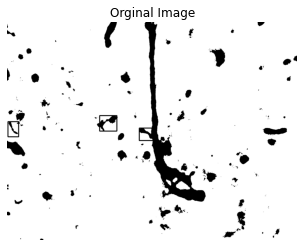

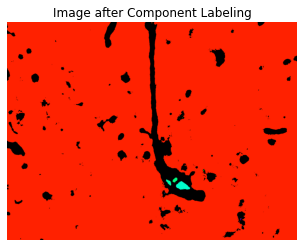

In [33]:
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()